# Interval Analysis Graphing Tool
## Intermountain Industrial Assessment Center (IIAC)
### Jason Flynn - May 17, 2023

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from datetime import datetime as dt
#import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [31]:
df = pd.read_csv('PCB Electric Interval Data 2019.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp',inplace = True)

for c in df.columns[:-1]:
    df[c] = df[c].str.extract('(\d+)').astype(float)

C:\Users\jFlyn\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname MST identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "
C:\Users\jFlyn\anaconda3\lib\site-packages\dateutil\parser\_parser.py:1207: UnknownTimezoneWarning: tzname MDT identified but not understood.  Pass `tzinfos` argument in order to correctly return a timezone-aware datetime.  In a future version, this will raise an exception.
  warnings.warn("tzname {tzname} identified but not understood.  "


In [35]:
time_diff = df.index[1].minute-df.index[0].minute

interval = 24*7*(60/time_diff)

data = []

for i in range(12):
    md = df[df.index.month == i+1]
    mdi = md.index

    for j in range(int(interval)):
        time = mdi[j].time()
        month = mdi[j].month
        day_of_week = mdi[j].weekday() + 1
        ##change title name
        kW = np.mean(md['PCB PCB-Virtual Power'].iloc[j::int(interval)])

        #uncomment to print values        
        #print(f"Time: {time}, Month: {month}, Day of Week: {day_of_week}, kW: {kW}")

        data.append([time, month, day_of_week, kW])

daily_profile = pd.DataFrame(data, columns=['Time', 'Month', 'Day of Week', 'kW'])

dp = daily_profile

In [37]:
results = []

for day in pd.date_range(start=df.index.min().date(), end=df.index.max().date(), freq='D'):
    daily_data = df[df.index.date == day.date()]

    if len(daily_data) > 0:
        max_value = daily_data['PCB PCB-Virtual Power'].max()
        max_time = daily_data.loc[daily_data['PCB PCB-Virtual Power'].idxmax()].name.time()
        min_value = daily_data['PCB PCB-Virtual Power'].min()
        min_time = daily_data.loc[daily_data['PCB PCB-Virtual Power'].idxmin()].name.time()
        results.append({'Date': day.date(), 'MaxValue': max_value, 'MaxTime': max_time, 'MinValue': min_value, 'MinTime': min_time})

daily_max_min = pd.concat([pd.DataFrame(result, index=[0]) for result in results], ignore_index=True)

mm = daily_max_min

In [29]:
#an array with all the month/day titles
month_titles = np.array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', ''])

day_titles = np.array(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', ''])

#a list of hours of the day so we can label the x ticks
H = ['0:00','1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00', '24:00', '']
Ip = ['12 am', '1 am', '2 am', '3 am', '4 am', '5 am', '6 am', '7 am', '8 am', '9 am', '10 am', '11 am', '12 pm', '1 pm', '2 pm', '3 pm', '4 pm', '5 pm', '6 pm', '7 pm', '8 pm', '9 pm', '10 pm', '11 pm', '12 am', '']
#a way to add commas to axis values in the thousands
commas = ticker.StrMethodFormatter('{x:,.0f}')

minor_tix = ticker.AutoMinorLocator(n = 2)

def exclude(column):
    r = []
    for u in column:
        if u >= np.mean(column)*0.85:
            r.append(u)
    return r

In [4]:
mm['month'] = pd.to_datetime(mm['Date']).dt.month
mm

,Date,MaxValue,MaxTime,MinValue,MinTime,month
0,2019-01-01,857.0,22:30:00,740.0,11:15:00,1
1,2019-01-02,1951.0,11:30:00,829.0,01:00:00,1
2,2019-01-03,2157.0,10:15:00,1045.0,02:30:00,1
3,2019-01-04,1999.0,11:15:00,1134.0,05:00:00,1
4,2019-01-05,1422.0,00:00:00,804.0,23:15:00,1
...,...,...,...,...,...,...
360,2019-12-27,894.0,16:15:00,221.0,08:30:00,12
361,2019-12-28,757.0,00:00:00,592.0,19:30:00,12
362,2019-12-29,644.0,01:00:00,547.0,14:30:00,12
363,2019-12-30,1967.0,15:00:00,632.0,00:00:00,12


# Max/Min kW for the Year

Days Accounted For: 246


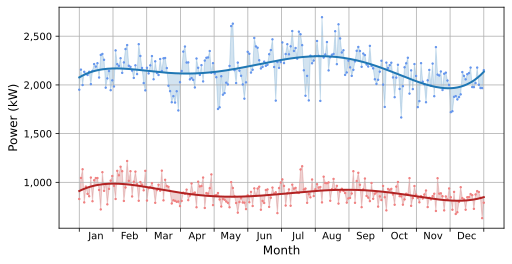

In [38]:
# upper = mm['MaxValue']
# lower = mm['MinValue']


#if you want to exclude days that have an upper kW output less than the mean * 0.85, then run this section of code
#-----------------------------------------------
# upper = exclude(mm['MaxValue'], 0.85)
# lower = exclude(mm['MinValue'], 0.85)

upper = []
lower = []
for u,l in zip(mm["MaxValue"],mm["MinValue"]):
    if u >= np.mean(mm['MaxValue'])*0.85:
        upper.append(u)
        lower.append(l)
# #-----------------------------------------------



time = np.linspace(0, 365, len(upper))   #an array for the x axis
tix = np.linspace(0, 365, 13)   #an array for the tickmarks

plt.figure(figsize=(8, 4))

#plt.plot([time, time], [upper, lower], color= 'cornflowerblue', linewidth = '1.6') #vertical line connecting the upper and lower values

plt.plot(time, upper, '.', color = 'cornflowerblue', markersize = '3', label = 'upper value') #plotting markers for the upper and lower values
plt.plot(time, lower, '.', color = 'lightcoral', markersize = '3', label = 'lower value')

upcoefs = np.polyfit(time, upper, deg = 5)
lowcoefs = np.polyfit(time, lower, deg = 5)

upline = np.polyval(upcoefs, time)
lowline = np.polyval(lowcoefs, time)

plt.plot(time, upline, color = 'tab:blue', linewidth = '2')
plt.plot(time, lowline, color = 'firebrick', linewidth = '2')


plt.fill_between(time, upper, upline,color = 'tab:blue', alpha = 0.2)
plt.fill_between(time, lower, lowline, color = 'firebrick', alpha = 0.2)

plt.xlabel('Month', size = 12)                                            #x label
plt.ylabel('Power (kW)', size = 12)                                       #y label
plt.xticks(ticks = tix, visible = False)                                  #hiding the x axis ticks
plt.gca().set_xticks(ticks = 15+tix, minor=True, labels = month_titles)   #naming the x ticks and putting them in the middle
plt.tick_params(axis = 'x', which = 'minor', size = 0)
plt.gca().yaxis.set_major_formatter(commas)                    #adding commas to the y axis values
plt.grid()                                                     #grid

plt.savefig('Max_Min_kW_For_The_Year.pdf')     #saves a figure into the same folder as this ipynb

n = len(time)
print(f'Days Accounted For: {n}')   #this is so you can see how many days are being plotted, useful if outliers were excluded


# kW max/min by the day of week

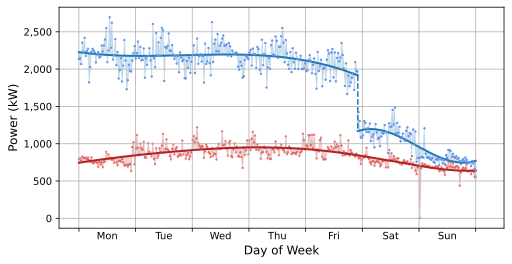

In [6]:
upper = mm['MaxValue']
lower = mm['MinValue']

mm['dayofweek'] = pd.to_datetime(mm['Date']).dt.dayofweek
mm = mm.sort_values(['dayofweek', 'Date'])

#---------------------------------------
upper = []
lower = []
wknd = []
wkdy = []
for i, n, d in zip(mm['MaxValue'], mm['MinValue'], mm['dayofweek']):
    if d >= 5 or i >= np.mean(mm['MaxValue'])*0.7:
        upper.append(i)
        lower.append(n)
        if d >= 5:
            wknd.append(i)
        else:
            wkdy.append(i)
#---------------------------------------

time = np.linspace(0, len(upper), len(upper))
wkdy_time = np.linspace(0, len(wkdy), len(wkdy))
wknd_time = np.linspace(0, len(wknd), len(wknd))

tix = np.linspace(0, len(upper), 8)

wknd_coefs = np.polyfit(wknd_time, wknd, deg = 3)
wkdy_coefs = np.polyfit(wkdy_time, wkdy, deg = 4)
lowcoefs = np.polyfit(time, lower, deg = 5)

wknd_mean = np.polyval(wknd_coefs, wknd_time)
wkdy_mean = np.polyval(wkdy_coefs, wkdy_time)
lmean = np.polyval(lowcoefs, time)

wknd_time = wknd_time + np.max(wkdy_time)

plt.figure(figsize=(8, 4))

plt.plot(wknd_time, wknd_mean, color = 'tab:blue', linewidth = '2')
plt.plot(wkdy_time, wkdy_mean, color = 'tab:blue', linewidth = '2')
plt.plot(time, lmean, color = 'firebrick', linewidth = '2')

plt.plot([wkdy_time[-1], wknd_time[0]], [wkdy_mean[-1], wknd_mean[0]], '--', color='tab:blue')

plt.fill_between(wkdy_time, upper[:len(wkdy)], wkdy_mean, color = 'tab:blue', alpha = 0.2)
plt.fill_between(wknd_time, upper[len(wkdy):], wknd_mean, color = 'tab:blue', alpha = 0.2)
plt.fill_between(time, lower, lmean, color = 'firebrick', alpha = 0.2)

plt.plot(time, upper, '.', color = 'cornflowerblue', markersize = '3', label = 'upper value') 
plt.plot(time, lower, '.', color = 'lightcoral', markersize = '3', label = 'lower value', zorder = 0)

plt.xticks(ticks = tix, labels = day_titles, visible = False)
plt.gca().set_xticks(ticks = tix + len(upper)/14, minor = True, labels = day_titles)
plt.tick_params(axis = 'x', which = 'minor', size = 0)

plt.ylabel('Power (kW)', size = 12)
plt.xlabel('Day of Week', size = 12)
plt.gca().yaxis.set_major_formatter(commas)
plt.grid()

plt.savefig('Max_Min_kW_By_Day_of_Week.pdf')


# Monthly kW Usage by Time of Day

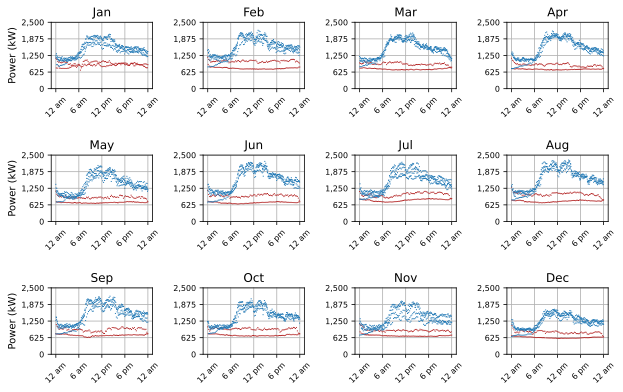

In [7]:
day_of_week = []
time = []
kW = []
month = []
for d, t, k, m in zip(dp['Day of Week'], dp['Time'], dp['kW'], dp['Month']):
    if d == 6 or d == 7:
        day_of_week.append(d)
        time.append(t)
        kW.append(k)
        month.append(m)

wknd = pd.DataFrame()
wknd['day_of_week'] = day_of_week
wknd['time'] = time
wknd['kW'] = kW
wknd['month'] = month


day_of_week = []
time = []
kW = []
month = []
for d, t, k, m in zip(dp['Day of Week'], dp['Time'], dp['kW'], dp['Month']):
    if d != 6 and d != 7:
        day_of_week.append(d)
        time.append(t)
        kW.append(k)
        month.append(m)

wkdy = pd.DataFrame()
wkdy['day_of_week'] = day_of_week
wkdy['time'] = time
wkdy['kW'] = kW
wkdy['month'] = month

wkdy = wkdy.sort_values(['month', 'time'])
wknd = wknd.sort_values(['month', 'time'])
#----------------------------------------------------------------------------

fig, axes = plt.subplots(nrows = 3, ncols = 4, figsize = (10, 6))   #creating 12 subplots
plt.subplots_adjust(wspace=0.5, hspace=1.0)                         #spacing out the subplots

for i, ax in enumerate(axes.flatten()):
    subset_wkdy = wkdy[wkdy['month'] == i + 1]    #separating the data frames into months
    subset_wknd = wknd[wknd['month'] == i + 1]      

    ax.plot(np.linspace(0, 24, len(subset_wknd)), (subset_wknd['kW']), ',', color = 'firebrick')
    ax.plot(np.linspace(0, 24, len(subset_wkdy)), (subset_wkdy['kW']), ',', color = 'tab:blue')     #plotting data


    ax.set_xticks(ticks = np.linspace(0, 24, 5), labels = Ip[::6], rotation = 45)  #x axis goes from 0 to 24, with 5 tickmarks
    ax.set_yticks(ticks = np.linspace(0, np.ceil(np.max(dp['kW'])/100)*100 + 100, 5))   #y axis goes from 0 to the max(rounded up to the next hundred) with 5 tickmarks
    ax.set_title(month_titles[i])          #naming the subplots 
    ax.tick_params(labelsize = 8)          #making the font size for the axis smaller
    if i % 4 == 0:                         #check if it's the leftmost subplot in each row
        ax.set_ylabel('Power (kW)', size = 10)                #y-axis label for the leftmost subplot
    ax.grid()                              #grid
    ax.yaxis.set_major_formatter(commas)   #add commas to the y axis

plt.savefig('Monthly_kW_by_Time_of_Day.pdf')     #saves a figure into the same folder as this ipynb


# Monthly kW Usage by Day of Week

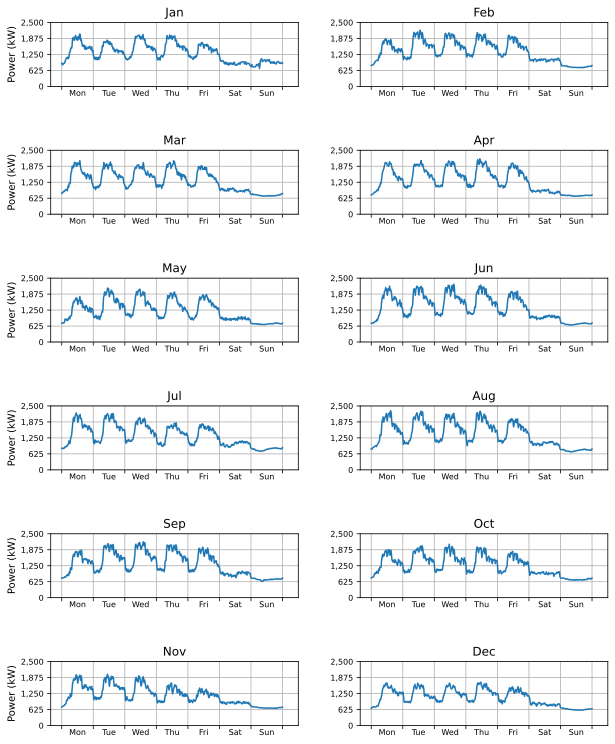

In [8]:

dp = dp.sort_values(['Month', 'Day of Week'])   #sorting the entire dataframe by month and then day of the week
dp['x'] = np.arange(len(dp))                    #creating a new column that assigns a number to each row in this new order

fig, axes = plt.subplots(nrows = 6, ncols = 2, figsize=(10, 12))  #creating 12 subplots
plt.subplots_adjust(top = .925, wspace=0.25, hspace=1)            #spacing out the subplots


for i, ax, in enumerate(axes.flatten()):
    subset = dp[dp['Month'] == i + 1]        #splitting the data into 12 subsets
    ax.plot(subset['x'], subset['kW'], '-', color = 'tab:blue')   #plotting each subset into it's respective subplot


    tix = np.linspace(min(subset['x']), max(subset['x']), 8)
    mtix = tix + len(subset['x'])/14

    ax.set_yticks(ticks = np.linspace(0, np.ceil(np.max(dp['kW'])/100)*100+100, 5))  #y axis goes from 0 to the max(rounded up to the next hundred) with 5 tickmarks
    ax.set_xticks(ticks = tix, labels = day_titles, visible = False)
    ax.set_xticks(ticks = mtix, minor = True, labels = day_titles, size = 8)
    ax.tick_params(axis = 'x', which = 'minor', size = 0)
    ax.tick_params(labelsize = 8)

    ax.set_title(month_titles[i])             #naming subplots
    if i % 2 == 0:                            #Check if it's the leftmost subplot in each row
        ax.set_ylabel('Power (kW)', size = 10)                   #y-axis label for the leftmost subplot
    ax.yaxis.set_major_formatter(commas)      #add commas to the y axis
    ax.grid() 


plt.savefig('Monthly_kW_by_Day_of_Week.pdf')   #saves a figure into the same folder as this ipynb


In [9]:
mm['month'] = pd.to_datetime(mm['Date']).dt.month


In [10]:
mm

,Date,MaxValue,MaxTime,MinValue,MinTime,month,dayofweek
6,2019-01-07,2135.0,11:30:00,794.0,00:15:00,1,0
13,2019-01-14,2144.0,15:00:00,806.0,00:00:00,1,0
20,2019-01-21,895.0,08:00:00,313.0,07:30:00,1,0
27,2019-01-28,2067.0,09:00:00,774.0,00:15:00,1,0
34,2019-02-04,2354.0,13:15:00,829.0,00:00:00,2,0
...,...,...,...,...,...,...,...
334,2019-12-01,700.0,00:15:00,591.0,12:00:00,12,6
341,2019-12-08,769.0,00:00:00,645.0,12:45:00,12,6
348,2019-12-15,735.0,00:45:00,625.0,11:45:00,12,6
355,2019-12-22,664.0,23:45:00,556.0,10:45:00,12,6


In [11]:
mm.loc[mm.groupby('month')['MaxValue'].idxmax()]

,Date,MaxValue,MaxTime,MinValue,MinTime,month,dayofweek
22,2019-01-23,2318.0,13:15:00,1104.0,04:00:00,1,2
55,2019-02-25,2418.0,10:45:00,811.0,00:00:00,2,0
65,2019-03-07,2296.0,13:45:00,991.0,04:00:00,3,3
93,2019-04-04,2394.0,13:45:00,883.0,04:30:00,4,3
134,2019-05-15,2629.0,11:00:00,942.0,04:30:00,5,2
154,2019-06-04,2482.0,15:00:00,938.0,00:45:00,6,1
189,2019-07-09,2553.0,10:30:00,976.0,05:30:00,7,1
216,2019-08-05,2695.0,15:00:00,794.0,00:45:00,8,0
258,2019-09-16,2401.0,15:00:00,807.0,00:15:00,9,0
289,2019-10-17,2279.0,13:30:00,875.0,02:00:00,10,3


In [12]:
dp.loc[dp.groupby('Month')['kW'].idxmax()]

,Time,Month,Day of Week,kW,x
631,13:45:00,1,1,2048.250000,55
1108,13:00:00,2,2,2198.750000,820
1687,13:45:00,3,1,2095.500000,1399
2346,10:30:00,4,4,2168.250000,2346
3308,10:45:00,5,2,2109.666667,2827
3803,14:45:00,6,3,2262.750000,3611
4076,11:00:00,7,1,2230.400000,4076
5147,14:45:00,8,1,2312.500000,4763
5720,14:00:00,9,3,2187.250000,5624
6189,11:15:00,10,3,2089.200000,6285


# Histogram of peaks by time of day

days accounted for: 246


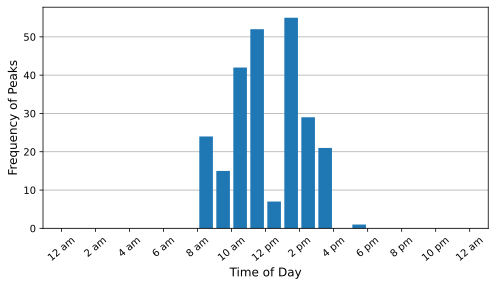

In [13]:
#if you want to exclude days that have an upper kW output less than the mean * 0.85, then run this section of code
#-----------------------------------------------
MaxTime = []
for u,t in zip(mm["MaxValue"],mm["MaxTime"]):
    if u >= np.mean(mm['MaxValue'])*0.85:
        MaxTime.append(t)
#-----------------------------------------------

hours = [time.hour for time in MaxTime]
tix = np.linspace(0, 23, 13)

plt.figure(figsize=(8, 4))
plt.hist(hours, bins = 24, range = (0, 23), rwidth = 0.8, color = 'tab:blue')
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y')

plt.xticks(ticks = tix, labels = Ip[::2], rotation = 40, size = 10)
plt.xlabel('Time of Day', size = 12)
plt.ylabel('Frequency of Peaks', size = 12)

plt.savefig('Peak_Frequency_by_Time_of_Day.pdf')
print(f'days accounted for: {len(MaxTime)}')

# Histogram of peaks by kW Values

days accounted for: 246


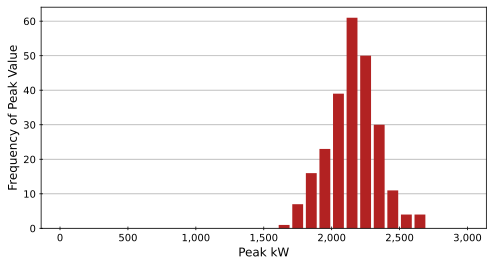

In [26]:
#if you want to exclude days that have an upper kW output less than the mean * 0.85, then run this section of code
#-----------------------------------------------


R = exclude(mm['MaxValue'], 0.85)


# MaxValue = []
# for u in mm["MaxValue"]:
#     if u >= np.mean(mm['MaxValue'])*0.85:
#         MaxValue.append(u)
# -----------------------------------------------

high = np.ceil(np.max(R)/1000)*1000

plt.figure(figsize=(8, 4))
plt.hist(R, bins = int(high/100), rwidth = 0.8, range = (0, high), color = 'firebrick')

plt.gca().xaxis.set_major_formatter(commas)
plt.gca().set_axisbelow(True)
plt.grid(axis = 'y')
plt.tick_params(axis = 'both', direction = 'inout')
plt.ylabel('Frequency of Peak Value', size = 12)
plt.xlabel('Peak kW', size = 12)

plt.savefig('Peak_Frequency_by_Peak_Value.pdf')

print(f'days accounted for: {len(R)}')

# How far has this come

### These are the very first graphs I came up with working on this project:

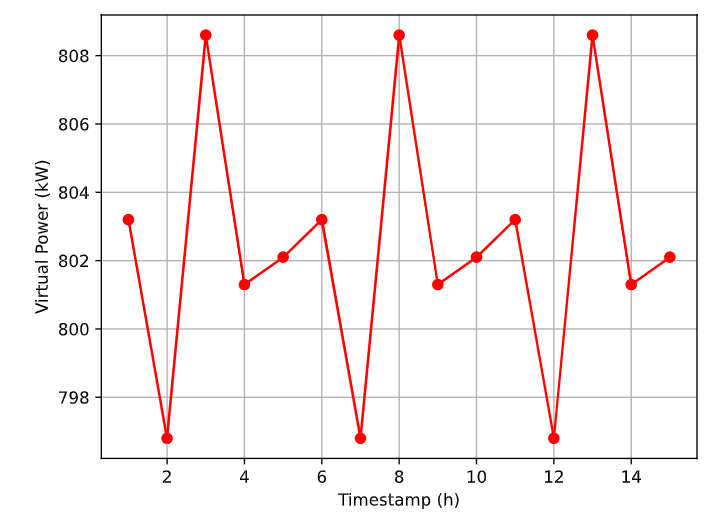
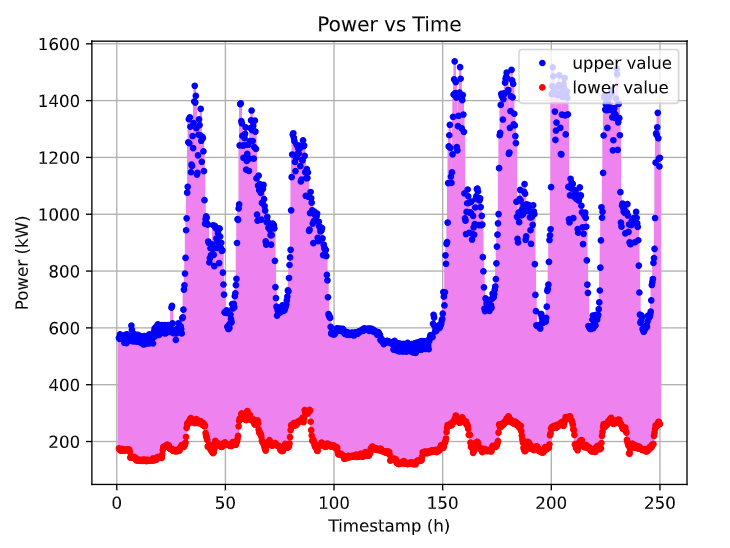
